In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_path = '/content/drive/My\ Drive/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

!rm /content/santa-dataset.zip

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

# Baseline CNN model



In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0

In [8]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [9]:
history_base_model = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
6/6 [==============================] - 58s 10s/step - loss: 0.7556 - accuracy: 0.5619 - val_loss: 0.9726 - val_accuracy: 0.5346
Epoch 2/75
6/6 [==============================] - 55s 9s/step - loss: 0.7086 - accuracy: 0.6360 - val_loss: 0.7464 - val_accuracy: 0.5000
Epoch 3/75
6/6 [==============================] - 55s 9s/step - loss: 0.6396 - accuracy: 0.6088 - val_loss: 0.6043 - val_accuracy: 0.6885
Epoch 4/75
6/6 [==============================] - 57s 9s/step - loss: 0.5360 - accuracy: 0.7085 - val_loss: 0.5039 - val_accuracy: 0.7654
Epoch 5/75
6/6 [==============================] - 58s 10s/step - loss: 0.4315 - accuracy: 0.8021 - val_loss: 0.5141 - val_accuracy: 0.7385
Epoch 6/75
6/6 [==============================] - 57s 9s/step - loss: 0.3648 - accuracy: 0.8625 - val_loss: 0.4240 - val_accuracy: 0.8308
Epoch 7/75
6/6 [==============================] - 56s 9s/step - loss: 0.3060 - accuracy: 0.904

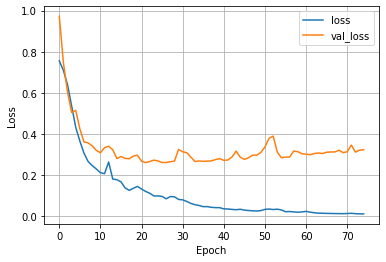

In [10]:
plot_loss(history_base_model)

## Image Augmentation

Memberikan variasi lebih terhadap data supaya model lebih general (tidak overfit).

https://keras.io/api/preprocessing/image/

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/


In [ ]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


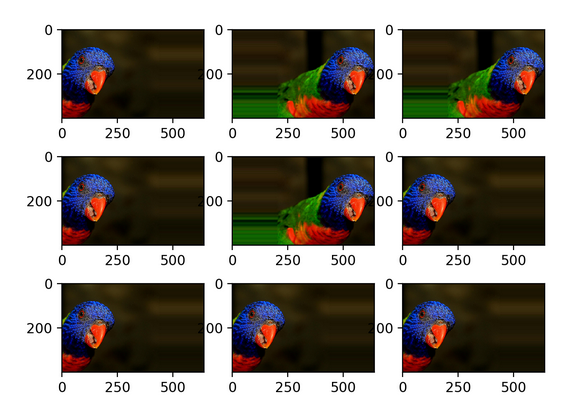

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Assignment

1. Tambahkan convolution layer berikut untuk data yang sudah dilakukan data augmentation:

    - Convolution layer dengan 32 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2
    - Convolution layer dengan 64 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2
    - Convolution layer dengan 128 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2

  Bandingkan hasil accuracy yang didapat dengan ketika training dilakukan dengan model baseline! Jelaskan kesimpulannya! Gunakan nilai epoch 100. Lalu bandingkan juga plot epoch terhadap lossnya!

2. Tentukan arsitektur CNN serta hyperparameter tuning bagi mendapatkan hasil terbaik untuk dataset ini!